In [1]:
%matplotlib inline 

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import seaborn as sns

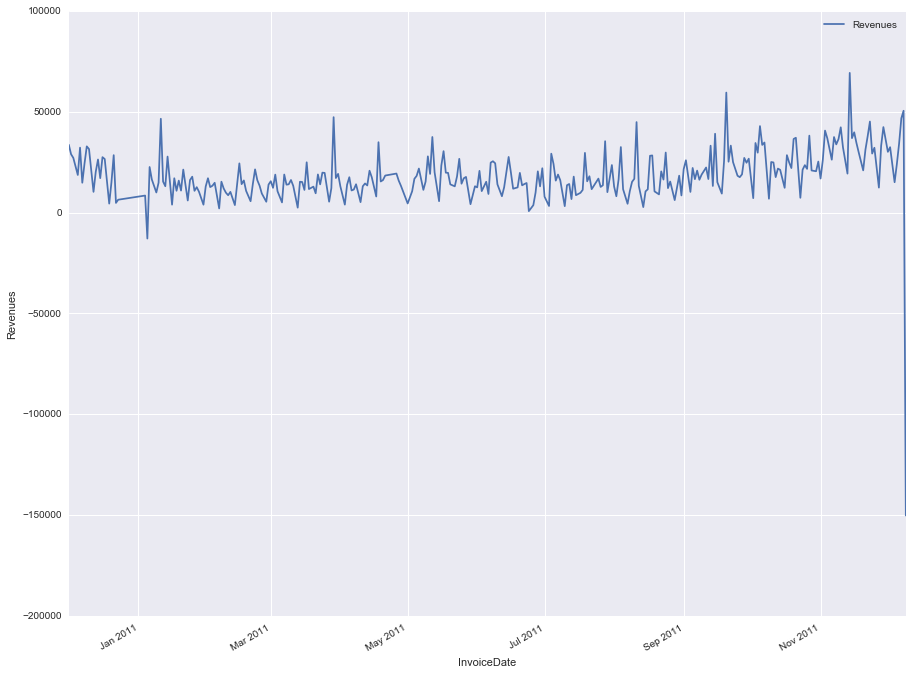

In [3]:
# read the initial csv
df = pd.read_csv(r"C:\UKretail.csv", delimiter=",", encoding="latin1")
# convert the InvoiceDate column to datetime 
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df1 = df.copy()
# calculate the Revenues
df1['Revenues'] = df1.Quantity * df1.UnitPrice
# group them by day
df2 = df1.groupby(pd.DatetimeIndex((df1['InvoiceDate'])).normalize())[['Revenues']].sum()
df2.index.name = 'InvoiceDate'
# save the as Revenues.csv
df2.to_csv(r"C:\Revenues.csv", sep=",", encoding="utf-8")
#plot the revenues series
df2.plot(figsize=(15, 12))
plt.ylabel('Revenues')

As we plot the Revenues with time we can see that there is an outlier for the revenue of the last day. We also notice that the time series isn’t stationary. For this reason we plot the correlogram and the partial correlogram (ACF and PACF).

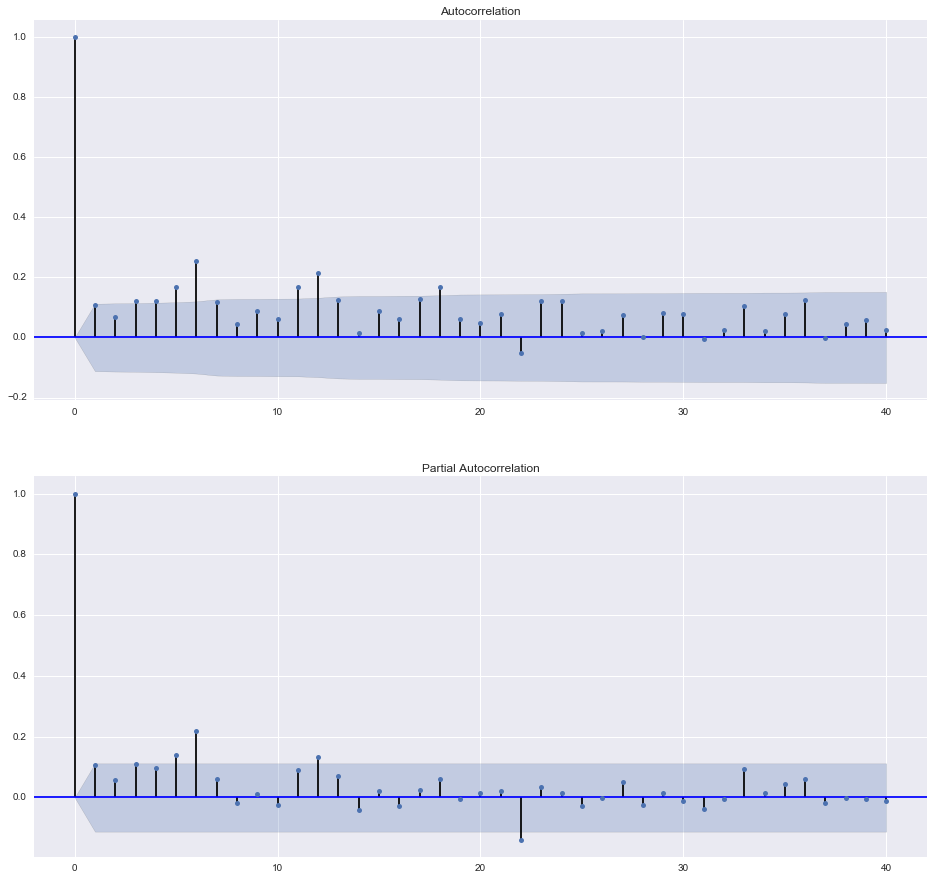

In [4]:
# plot the ACF and PACF
fig = plt.figure(figsize=(16,15))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df2, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df2, lags=40, ax=ax2)